In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
from scipy.stats import zscore

#seaborn Gr-Bk-Rd palette
pal = sns.diverging_palette(127.7, 12.2, l=53.4, n=255, center="dark")

---
## GSE60926

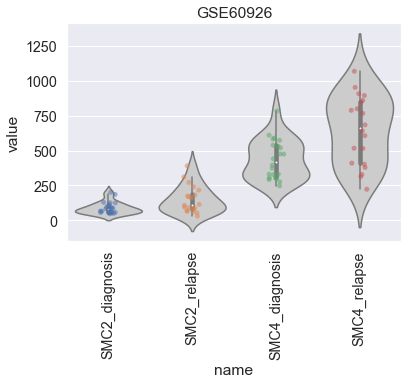

In [168]:
table = pd.read_csv('./GSE60926.csv')

plt.subplots()

sns.violinplot(data=table, x = table['name'], y = table['value'], color="0.8", scale='width').set_title('GSE60926')
sns.stripplot(data=table, x = table['name'], y = table['value'], jitter=True, alpha=0.5)
plt.xticks(rotation=90)

plt.savefig('./GSE60926.png', dpi=300, bbox_inches='tight')

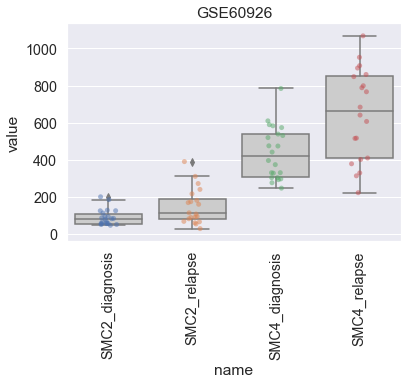

In [148]:
plt.subplots()

sns.boxplot(data=table, x = table['name'], y = table['value'], color="0.8").set_title('GSE60926')
sns.stripplot(data=table, x = table['name'], y = table['value'], jitter=True, alpha=0.5)
plt.xticks(rotation=90)

plt.savefig('./GSE60926_box.png', dpi=300, bbox_inches='tight')

In [225]:
nm = ['SMC2_diagnosis', 'SMC2_relapse', 'SMC4_diagnosis', 'SMC4_relapse']
j=0

for i in table['name'].unique():
    nm[j] = table[table['name'] == i]
    nm[j] = nm[j].reset_index()
    j += 1

dia = pd.DataFrame({'SMC2_diagnosis':nm[0]['value'], 'SMC2_relapse':nm[1]['value'], 'SMC4_diagnosis':nm[2]['value'], 'SMC4_relapse':nm[3]['value']})
dia = dia.mean()
dia = pd.DataFrame(dia)

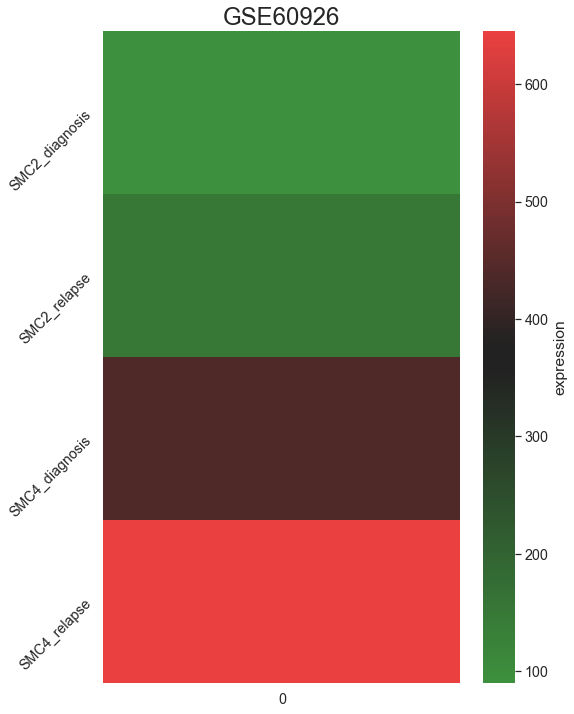

In [226]:
plt.subplots(figsize = (8, 12))
sns.heatmap(dia, cmap=pal, cbar_kws={'label': 'expression'}).set_title('GSE60926', fontsize=24)
plt.yticks(rotation=45)
plt.savefig('./heatmap_gse60926_dia.png', dpi=300)

---
## GSE28460

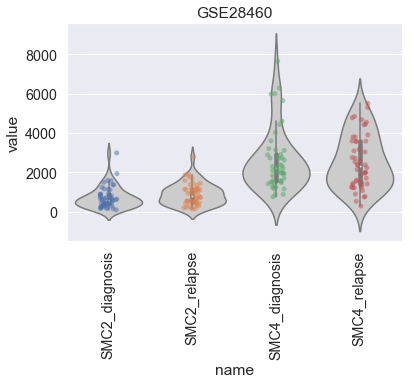

In [149]:
table = pd.read_csv('./GSE28460.csv')

plt.subplots()

sns.violinplot(data=table, x = table['name'], y = table['value'], color="0.8", scale='width').set_title('GSE28460')
sns.stripplot(data=table, x = table['name'], y = table['value'], jitter=True, alpha=0.5)
plt.xticks(rotation=90)

plt.savefig('./GSE28460.png', dpi=300, bbox_inches='tight')

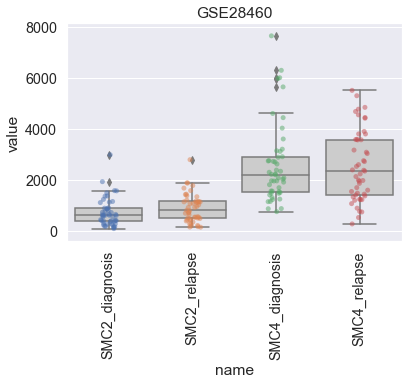

In [150]:
plt.subplots()

sns.boxplot(data=table, x = table['name'], y = table['value'], color="0.8").set_title('GSE28460')
sns.stripplot(data=table, x = table['name'], y = table['value'], jitter=True, alpha=0.5)
plt.xticks(rotation=90)

plt.savefig('./GSE28460_box.png', dpi=300, bbox_inches='tight')

---
## GSE13576

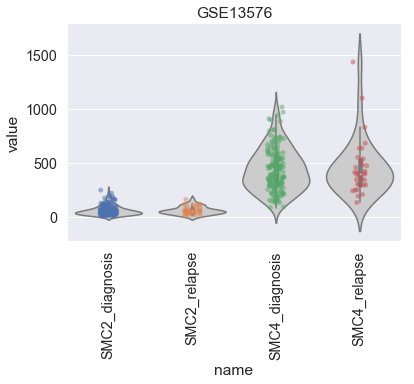

In [7]:
table = pd.read_csv('./GSE13576.csv')

plt.subplots()

sns.violinplot(data=table, x = table['name'], y = table['value'], color="0.8", scale='width').set_title('GSE13576')
sns.stripplot(data=table, x = table['name'], y = table['value'], jitter=True, alpha=0.5)
plt.xticks(rotation=90)

plt.savefig('./GSE13576.png', dpi=300, bbox_inches='tight')

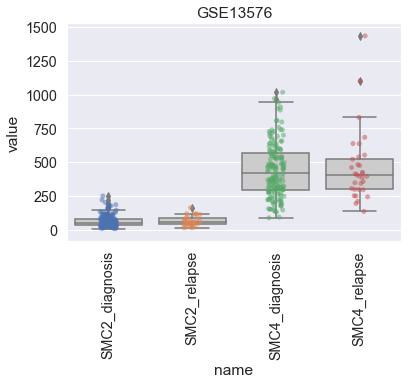

In [8]:
plt.subplots()

sns.boxplot(data=table, x = table['name'], y = table['value'], color="0.8").set_title('GSE13576')
sns.stripplot(data=table, x = table['name'], y = table['value'], jitter=True, alpha=0.5)
plt.xticks(rotation=90)

plt.savefig('./GSE13576_box.png', dpi=300, bbox_inches='tight')

---
## TARGET-ALL

In [131]:
#data input
table = pd.read_csv("./all_phase2_target_2018_pub_(pediatric)/all_phase2_target_2018_pub_clinical_data.csv")
rna = pd.read_csv("./all_phase2_target_2018_pub_(pediatric)/data_expression_median.txt", sep = '\t', header = None).T

rna.columns = rna.iloc[0,:]
rna = rna[2:]

table = pd.merge(table, rna, left_on = 'Sample ID', right_on = 'Hugo_Symbol')

#########################################non-paired sample
m = (table['Sample ID'].str.contains('-04') | table['Sample ID'].str.contains('-40')) == True
m2 = (table['Sample ID'].str.contains('-09') | table['Sample ID'].str.contains('-03')) == True 

paired = pd.concat([table[m], table[m2]])
paired = paired.sort_values(by='Sample ID').reset_index()

paired['Relapse'] = paired['Sample ID'].str.contains('-04') == True

#data output
eset = paired.loc[:,'DDR1':'LOC652743']
pset = paired.loc[:, ['Sample ID', 'Relapse']]

#nomalize
eset2 = eset.apply(pd.to_numeric, errors='coerce')
#eset2 = eset2.apply(lambda x: np.log2(x)) 

eset2.to_csv('./all_phase2_target_2018_pub_(pediatric)/eset.csv')
pset.to_csv('./all_phase2_target_2018_pub_(pediatric)/pset.csv')

In [132]:
m = pset['Relapse'] == True

smc2_r = eset2[m]['SMC2']
smc2_d = eset2[-m]['SMC2']
smc4_r = eset2[m]['SMC4']
smc4_d = eset2[-m]['SMC4']

dia = pd.DataFrame([smc2_d, smc4_d]).T
rel = pd.DataFrame([smc2_r, smc4_r]).T

dia.to_csv('./dia.csv', index=False)
rel.to_csv('./rel.csv', index=False)

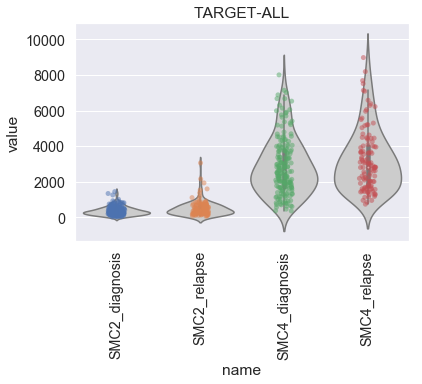

In [156]:
table = pd.read_csv('./TARGET.csv')

plt.subplots()

sns.violinplot(data=table, x = table['name'], y = table['value'], color="0.8", scale='width').set_title('TARGET-ALL')
sns.stripplot(data=table, x = table['name'], y = table['value'], jitter=True, alpha=0.5)
plt.xticks(rotation=90)

plt.savefig('./TARGET.png', dpi=300, bbox_inches='tight')

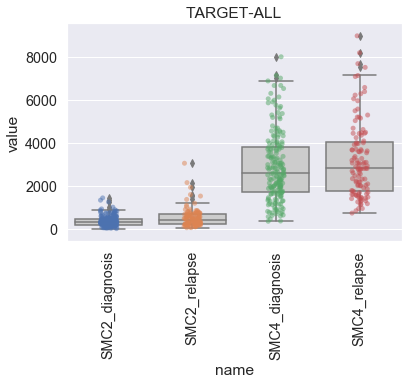

In [157]:
plt.subplots()

sns.boxplot(data=table, x = table['name'], y = table['value'], color="0.8").set_title('TARGET-ALL')
sns.stripplot(data=table, x = table['name'], y = table['value'], jitter=True, alpha=0.5)
plt.xticks(rotation=90)

plt.savefig('./TARGET_box.png', dpi=300, bbox_inches='tight')